# Proyecto Computer Vision - Primera Entrega

### Caso de uso generalizable para Object Tracking and People Tracking

**Autor**

- Adolfo Fuentes Jofré

## Introducción

### Problema o necesidad

Un problema recurrente en la optimización de Layout (posición de los productos) es generar áreas con mapas de calor que representan el flujo de clientes, esta información es útil para saber que zonas de la tienda son mas concurridas y tiene un mayor flujo de personas de manera tal de posicionar los productos de mayor valor para en negocio en esa zona y/o reoptimizar en Layout. Este problema es tranversal en mutiples Industrias desde Retail, Centros Comerciales hasta un Casino.


### Dataset

Video de camara de seguridad de personas caminando en un centro comercial. Video de uso gratuito (Free Stock video footage YouTube)

### Objetivos

Generar un sistema automatizado que permita:

- Realizar el Tracking de las personas caminando
- Delimitar en un cuadro a las personas y asignar un id distinto a cada persona
- Contar el flujo total de personas que transitan por una zona especifica

## Preprocesamiento

### Librerias



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

### Video a Imagenes

**Abrimos el Video**

In [2]:
import cv2
cap = cv2.VideoCapture('In\\Video.mp4')
print(cap.isOpened())

True


**Vemos la cantidad de cuadrosdel video y la cantidad de pixeles de alto y ancho**

In [3]:
video_fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
duration=total_frames/video_fps 

print(f"Frame Per second: {video_fps } \nTotal Frames: {total_frames} \nHeight: {height} \nWidth: {width} \nLength: {duration}")

Frame Per second: 25.0 
Total Frames: 341.0 
Height: 720.0 
Width: 1280.0 
Length: 13.64


**Graficamos la imagen del primer segundo del video**

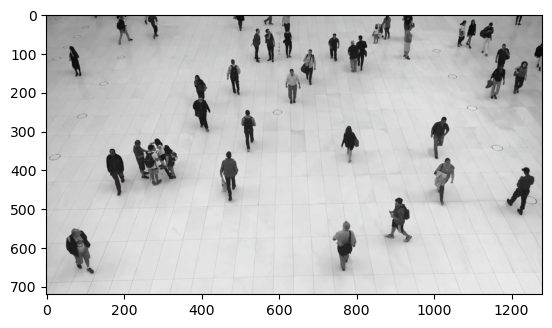

In [4]:
sec=1 # sec= segundo 
cap.set(cv2.CAP_PROP_POS_MSEC,(sec*1000)) # milisegundos
success,image = cap.read()
plt.imshow(image)


**Exportamos una imagen cada un segundo**

In [5]:
pathOut="Out\\"

for i in range(0,136):
    cap.set(cv2.CAP_PROP_POS_MSEC,(i*100))    # MILISEGUNDOS 
    success,image = cap.read()
    print ('Read a new frame: ', success)
    cv2.imwrite(pathOut + "frame%d.jpg" % i, image)  

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

### Cortar Imagenes

In [6]:
x1=0
y1=0
x2=int(width-768)
y2=int(height-508)
print(x2,y2)

512 212


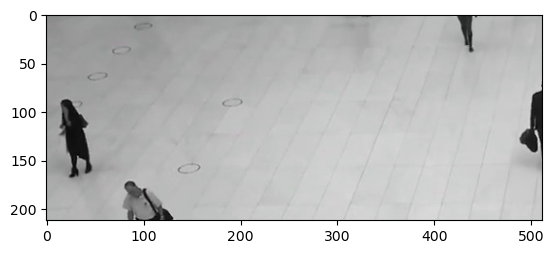

In [7]:
plt.imshow(image)
crop_img = image[y1:y2, x1:x2]
plt.imshow(crop_img)

### Resize de Imagenes

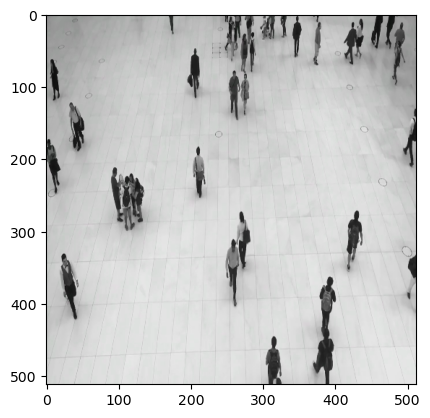

In [8]:
# dsize
dsize = (512, 512)

# resize image
re_img = cv2.resize(image, dsize)
plt.imshow(re_img)


### Iteración del Resize

In [9]:
for i in range(0,136):
    src = cv2.imread("Out\\frame%d.jpg" % i, cv2.IMREAD_UNCHANGED)
    re_img = cv2.resize(src, dsize)
    cv2.imwrite(pathOut +"resize\\frame_resize%d.jpg" % i,re_img) 
    print ('Resize: ', success) 

Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize

### Filtros

**Probamos un cambio de color a escala "Gray" y luego implementamos un filtro Gaussiano 'Blur'**

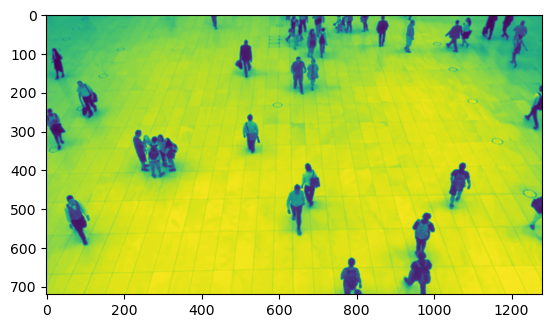

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)

### Iteración de Filtros

In [11]:
for i in range(0,136):
    img = cv2.imread("Out\\frame%d.jpg" % i, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred_2 = cv2.GaussianBlur(gray, (5, 5), 0)
    blurred_3 = blurred_2 * 255
    cv2.imwrite(pathOut +"filter\\frame_filter%d.jpg" % i,blurred_3.astype(np.uint8)) 
    print ('Resize: ', success) 

Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize:  True
Resize